In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import operator
import sys
from tsne import bh_sne
import unicodecsv

In [2]:
def load_state_embs(from_emb_file, subset_size=1000):
    with open(from_emb_file, 'rb') as f:
        reader = unicodecsv.reader(f)
        emb_data = list(reader)
    return np.asarray(emb_data[:subset_size], dtype=np.float64)

def load_state_strs(from_str_file, subset_size=1000):
    with open(from_str_file, 'r') as f:
        str_data = f.read().split('\n')[:-1]  # Ignore trailing newline
        
    # Process text features
    fields = str_data[:subset_size]
    for r in range(len(fields)):
        fields[r] = eval(fields[r])
    fields = np.asarray(fields)
    return fields

In [3]:
def t_sne_vis(emb_data, str_data):
    field_names = ['Original subj', 'Previous action', 'Previous subj', 'Previous doc', 'Answer from doc']
    
    vis_data = bh_sne(emb_data)
    vis_data_x, vis_data_y = vis_data[:, 0], vis_data[:, 1]
    
    # Colorise according to each component of state
    for feature in range(len(field_names)):
        # Define order for categorical variables (e.g. subject, or question template)
        category_order = set(str_data[:, feature])
        category_order_dict = dict([(item, i) for i, item in enumerate(category_order)])
        
        if len(category_order) > 50:
            fig, ax = plt.subplots(figsize=(10,10))
            plt.title(field_names[feature] + ' (%i unique variations)' % len(category_order))
            ax.scatter(vis_data_x, vis_data_y, c=[category_order_dict[f] for f in str_data[:, feature]],
                       cmap=plt.cm.get_cmap('jet', len(category_order)))
            plt.show()
        else: # Show color bar legend
            fig, ax = plt.subplots(figsize=(15,10), sharex=False, sharey=False)
            gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
            ax0 = plt.subplot(gs[0])
            ax0.scatter(vis_data_x, vis_data_y, c=[category_order_dict[f] for f in str_data[:, feature]],
                        cmap=plt.cm.get_cmap('jet', len(category_order)))
            plt.title(field_names[feature] + ' (%i unique variations)' % len(category_order))
            ax1 = plt.subplot(gs[1])
            plot_color_legend(ax1, sorted(category_order_dict.items(), key=operator.itemgetter(1)))
            plt.show()

        add_annotations = False
        if add_annotations:
            for i, row in enumerate(str_data):
                ax.annotate('\n'.join([elem[:50] for elem in row]), (vis_data_x[i], vis_data_y[i]))
        

In [4]:
def plot_color_legend(ax, labels, cmap='jet'):
    #f = plt.figure()
    num_shades = len(labels)
    plot_height = num_shades
    m = np.zeros([num_shades,1])
    step_size = 1.0/num_shades
    for i in range(num_shades):
        m[i,0] = i*step_size
    #print(m)
    if len(labels) < 10:
        plt.imshow(m, cmap='jet', aspect=num_shades*2)#shape=(0.5,10))#aspect=num_shades)
    else:
        plt.imshow(m, cmap='jet', shape=(1,10))
    ax.yaxis.tick_right()
    plt.xticks(np.arange(0))
    plt.yticks(np.arange(0, plot_height, plot_height/num_shades), labels)
    #plt.show()

#plot_color_legend([('municipality of', 0), ('located', 1), ('what kind of socks does wear', 2), ('where is', 3)])

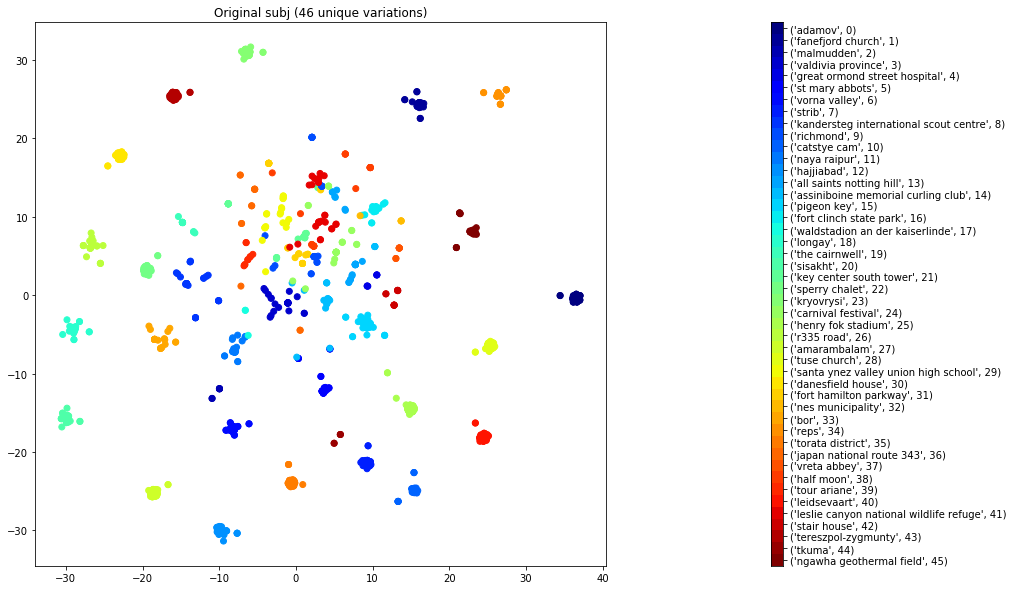

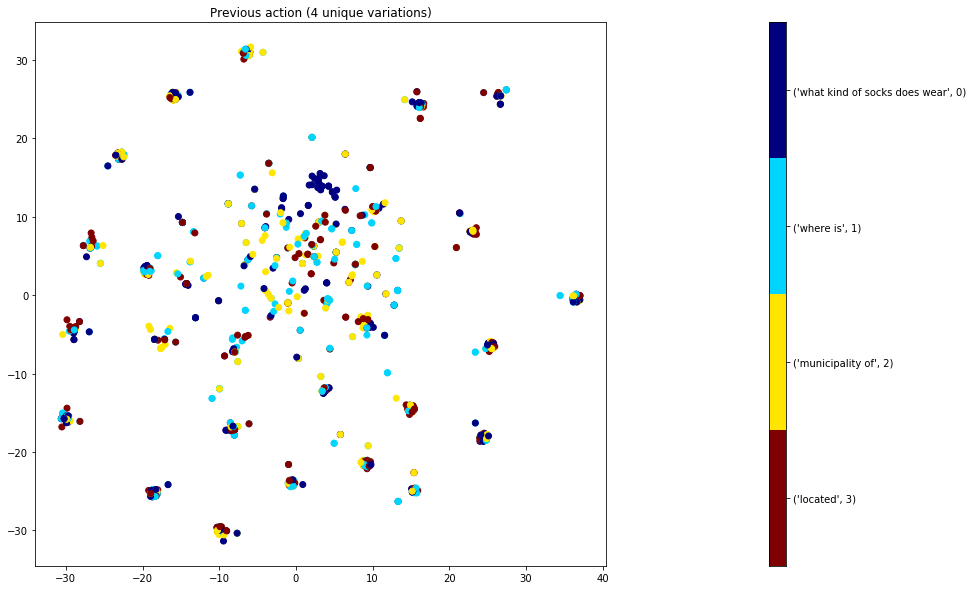

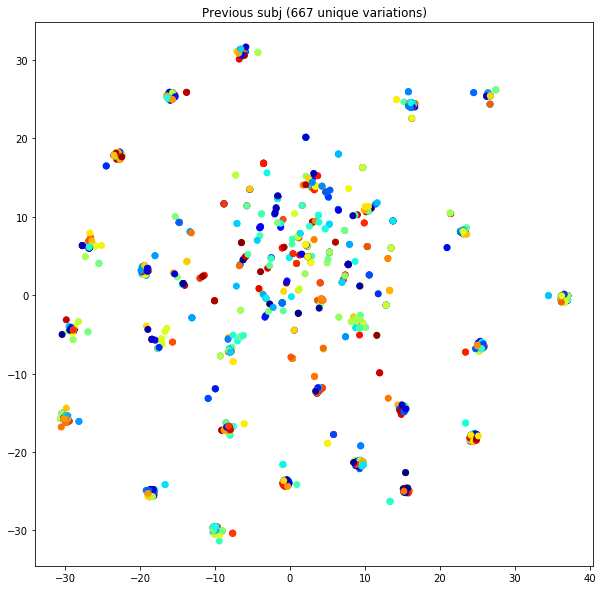

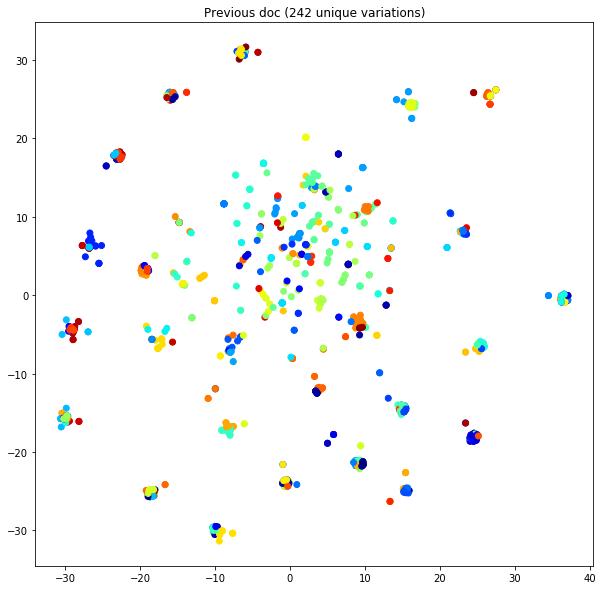

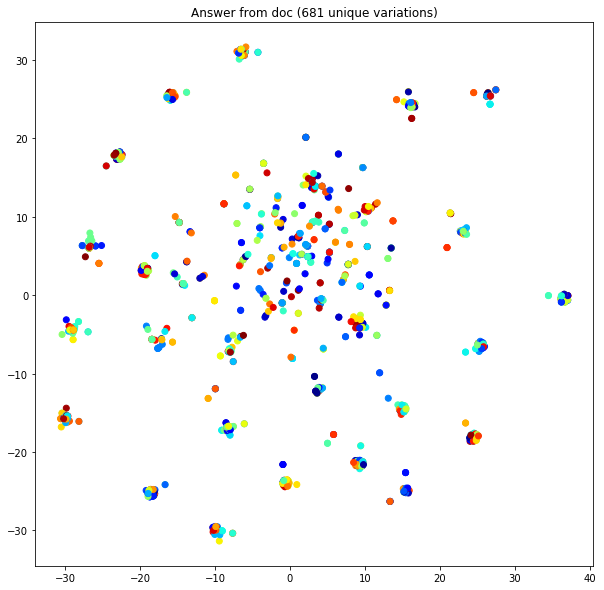

In [5]:
tf_idf_path = 'tf_idf_states-100.csv'
avg_path = 'avg_states-100.csv'
state_str_path = 'state-strs-100.txt'

tf_idf_emb = load_state_embs(tf_idf_path)
avg_emb = load_state_embs(avg_path)
state_strs = load_state_strs(state_str_path)

t_sne_vis(tf_idf_emb, state_strs)

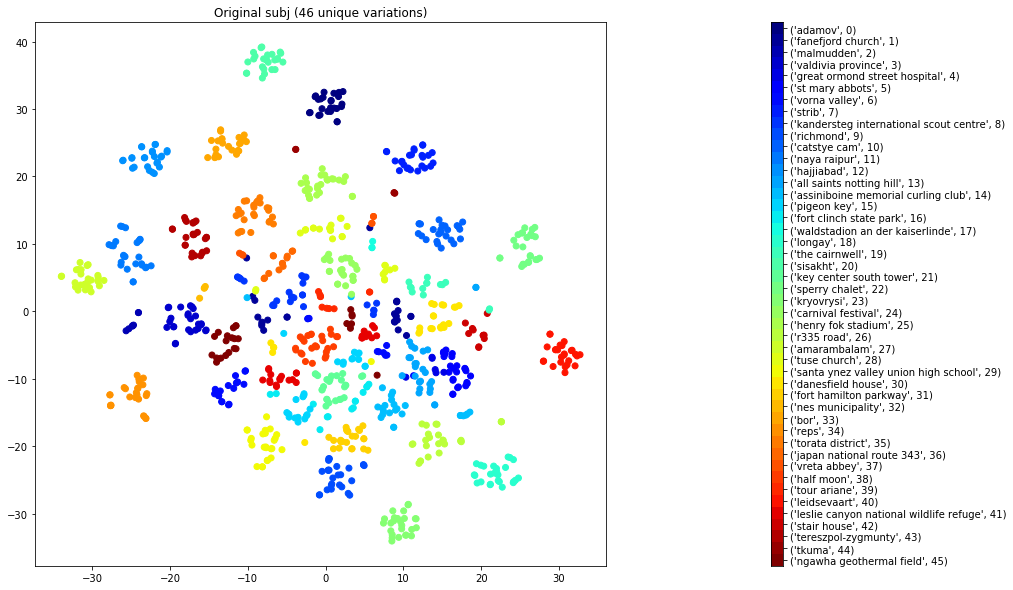

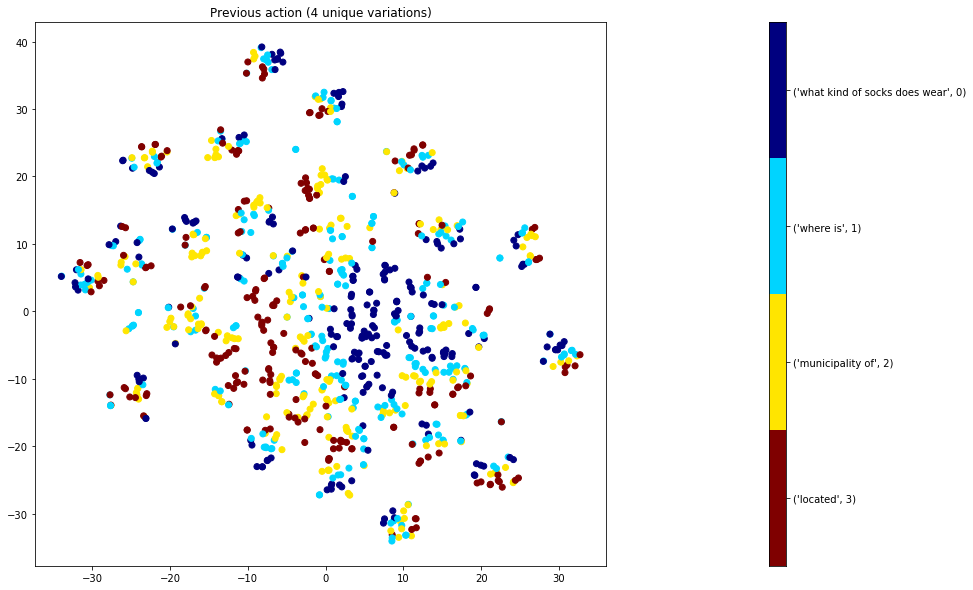

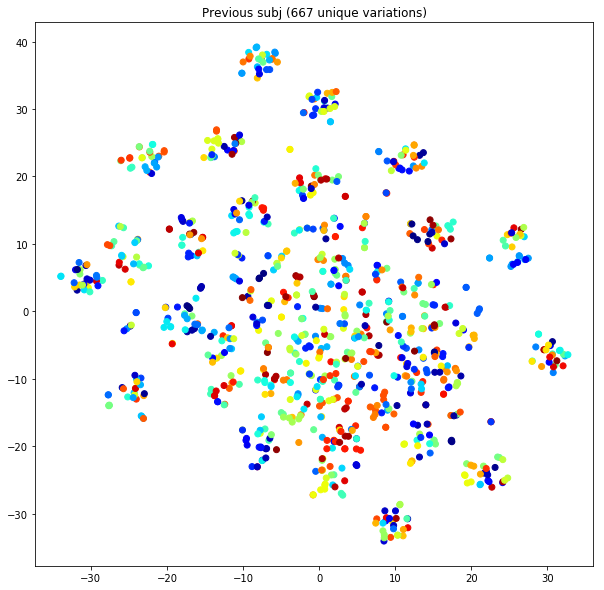

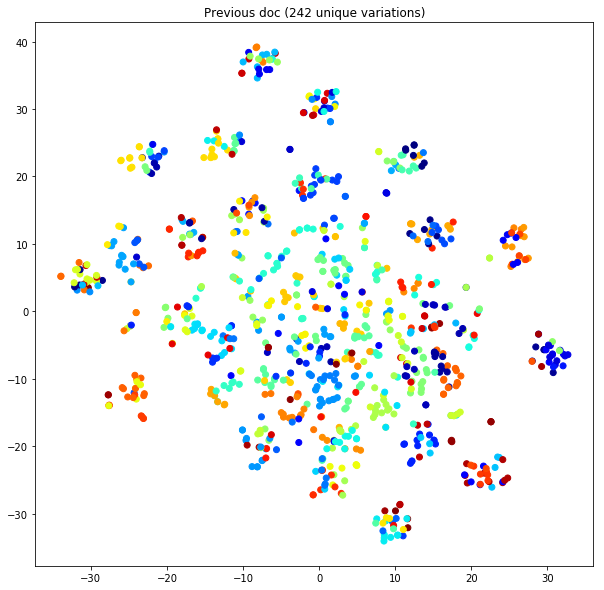

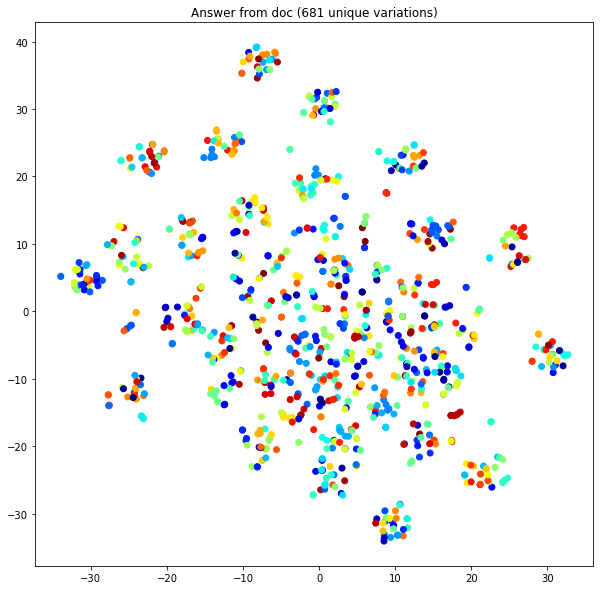

In [6]:
t_sne_vis(avg_emb, state_strs)